In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001098146"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001098146
SIC,6021
Description,NATIONAL COMMERCIAL BANKS
Name,PATRIOT NATIONAL BANCORP INC
Ticker,PNBK


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,12.0,8.758333e+00,7.728697e+00,1.09,1.475,8.375,15.665,17.51
interest income,21.0,6.865476e+06,1.658438e+06,4856000.00,5983000.000,6310000.000,7187000.000,10929000.00
net income,23.0,7.172174e+05,4.493703e+06,-8983000.00,304000.000,600000.000,746500.000,17261000.00
net interest income,23.0,5.318261e+06,9.741759e+05,4009000.00,4640500.000,5116000.000,5491500.000,7105000.00
provision for loan losses,21.0,3.955714e+05,1.670605e+06,-1713000.00,0.000,0.000,250000.000,6982000.00


# Plots

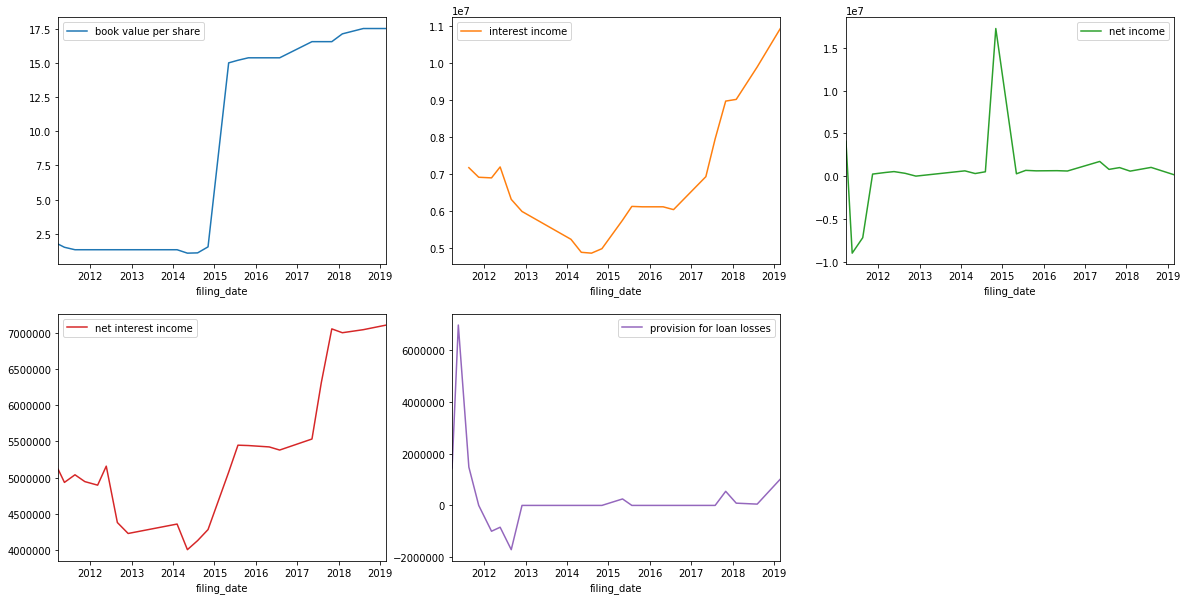

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0001098146 book value per share       2011Q3 to 2013Q4: 10 periods  missing   
           book value per share                             2014Q4  missing   
           book value per share        2015Q4 to 2016Q4: 5 periods  missing   
           book value per share        2017Q2 to 2017Q3: 2 periods  missing   
           book value per share                             2018Q1  missing   
           book value per share        2018Q3 to 2018Q4: 2 periods  missing   
           interest income             2010Q4 to 2011Q1: 2 periods  missing   
           interest income             2012Q4 to 2013Q3: 4 periods  missing   
           interest income                                  2014Q4  missing   
           interest income                                  2015Q4  missing   
           interest income             2016Q3 to 2016Q4: 2 periods  missing   
           interest income                                  2018Q1  missing   
           interest income                                  2018Q3  missing   
           net income                  2012Q4 to 2013Q3: 4 periods  missing   
           net income                                       2014Q4  missing   
           net income                                       2015Q4  missing   
           net income                  2016Q3 to 2016Q4: 2 periods  missing   
           net income                                       2018Q1  missing   
           net income                                       2018Q3  missing   
           net interest income         2012Q4 to 2013Q3: 4 periods  missing   
           net interest income                              2014Q4  missing   
           net interest income                              2015Q4  missing   
           net interest income         2016Q3 to 2016Q4: 2 periods  missing   
           net interest income                              2018Q1  missing   
           net interest income                              2018Q3  missing   
           provision for loan losses   2012Q4 to 2013Q3: 4 periods  missing   
           provision for loan losses                        2014Q4  missing   
           provision for loan losses                        2015Q4  missing   
           provision for loan losses   2016Q3 to 2017Q2: 4 periods  missing   
           provision for loan losses                        2018Q1  missing   
           provision for loan losses                        2018Q3  missing   
           total revenue                                      None    empty   

                                                 message  
cik        item                                           
0001098146 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net i

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()